In [3]:
import pandas as pd
import os

In [2]:
import seaborn as sns

In [15]:
data_dir = "./data/"
datasets = os.listdir(data_dir)
dfs = []
for dataset in datasets:
    df = pd.read_csv(data_dir+dataset)
    df = df[['ds', 'public.customer']].rename(columns={"public.customer": "y"})
    df['ds'] = df['ds']-df['ds'].min()
    df['ds'] = pd.to_datetime(df['ds'], unit='s')
    df['type'] = dataset.split('_')[-1]
    dfs.append(df)
merged = pd.concat(dfs).reset_index()

In [16]:
merged.type.unique()

array(['growth2.csv', '100.csv', '40.csv', '5.csv'], dtype=object)

<AxesSubplot:xlabel='ds', ylabel='y'>

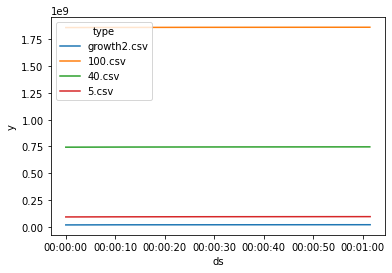

In [17]:
sns.lineplot(data=merged, x='ds', y='y', hue='type')

<AxesSubplot:xlabel='ds', ylabel='y'>

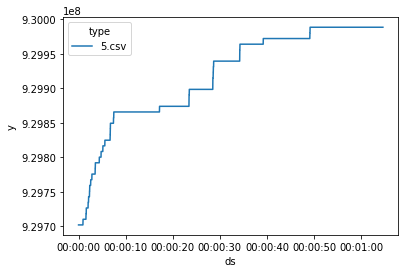

In [21]:
df = pd.read_csv(data_dir+'tpcc_table_growth_scalefac50autovacuum.csv')
df = df[['ds', 'public.customer']].rename(columns={"public.customer": "y"})
df['ds'] = df['ds']-df['ds'].min()
df['ds'] = pd.to_datetime(df['ds'], unit='s')
df['type'] = dataset.split('_')[-1]
sns.lineplot(data=df, x='ds', y='y', hue='type')

## Autovacuum enabled

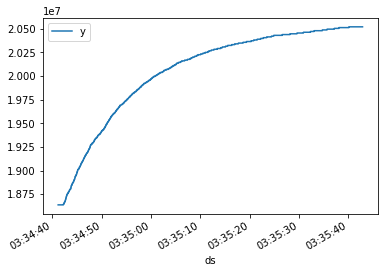

In [3]:
df.plot(x='ds', y='y')

## Autovacuum disabled

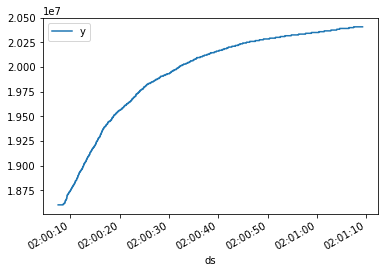

In [4]:
df2.plot(x='ds', y='y')

In [119]:
df = pd.read_csv('./data/azvm/tpcc_scale_100_worktime_3600_samplefreq_1_tsizeAnddeadtuple.csv')

In [120]:
df.head()

,ds,table_name,relid,schemaname,relname,seq_scan,seq_tup_read,idx_scan,idx_tup_fetch,n_tup_ins,...,n_ins_since_vacuum,last_vacuum,last_autovacuum,last_analyze,last_autoanalyze,vacuum_count,autovacuum_count,analyze_count,autoanalyze_count,pg_table_size
0,1.650401e+09,public.customer,17287,public,customer,2,0,6000000.0,97106539.0,3000000,...,360000,NaN,2022-04-19 20:41:54.438578+00:00,NaN,2022-04-19 20:44:48.352263+00:00,0,10,0,14,1859182592
1,1.650401e+09,public.district,17277,public,district,998570,172100607,5001431.0,5001431.0,1000,...,1000,NaN,NaN,NaN,2022-04-19 20:41:46.281870+00:00,0,0,0,8,147456
2,1.650401e+09,public.history,17300,public,history,0,0,NaN,NaN,3000000,...,240000,NaN,2022-04-19 20:43:06.522101+00:00,NaN,2022-04-19 20:43:07.457782+00:00,0,10,0,13,258940928
3,1.650401e+09,public.item,17257,public,item,1,0,10000000.0,10000000.0,100000,...,0,NaN,2022-04-19 20:20:47.094133+00:00,NaN,2022-04-19 20:20:47.243844+00:00,0,1,0,1,10444800
4,1.650401e+09,public.new_order,17327,public,new_order,1,0,0.0,0.0,900000,...,63000,NaN,2022-04-19 20:43:50.975887+00:00,NaN,2022-04-19 20:43:51.159922+00:00,0,10,0,15,39895040


In [121]:
df.table_name.unique()

array(['public.customer', 'public.district', 'public.history',
       'public.item', 'public.new_order', 'public.oorder',
       'public.order_line', 'public.stock', 'public.warehouse'],
      dtype=object)

In [122]:
df.columns

Index(['ds', 'table_name', 'relid', 'schemaname', 'relname', 'seq_scan',
       'seq_tup_read', 'idx_scan', 'idx_tup_fetch', 'n_tup_ins', 'n_tup_upd',
       'n_tup_del', 'n_tup_hot_upd', 'n_live_tup', 'n_dead_tup',
       'n_mod_since_analyze', 'n_ins_since_vacuum', 'last_vacuum',
       'last_autovacuum', 'last_analyze', 'last_autoanalyze', 'vacuum_count',
       'autovacuum_count', 'analyze_count', 'autoanalyze_count',
       'pg_table_size'],
      dtype='object')

In [123]:
df['ds'] = df['ds']-df['ds'].min()
df['ds'] = pd.to_datetime(df['ds'], unit='s')

In [124]:
def plot_growth(df, col):
#     df['ds'] = df['ds']-df['ds'].min()
#     df['ds'] = pd.to_datetime(df['ds'], unit='s')
    return sns.lineplot(data=df, x='ds', y=col, hue='table_name')

<AxesSubplot:>

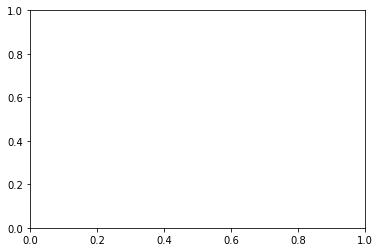

In [125]:
df1 = df[df['table_name'] == 'public.votes']
plot_growth(df1.copy(), 'n_dead_tup')

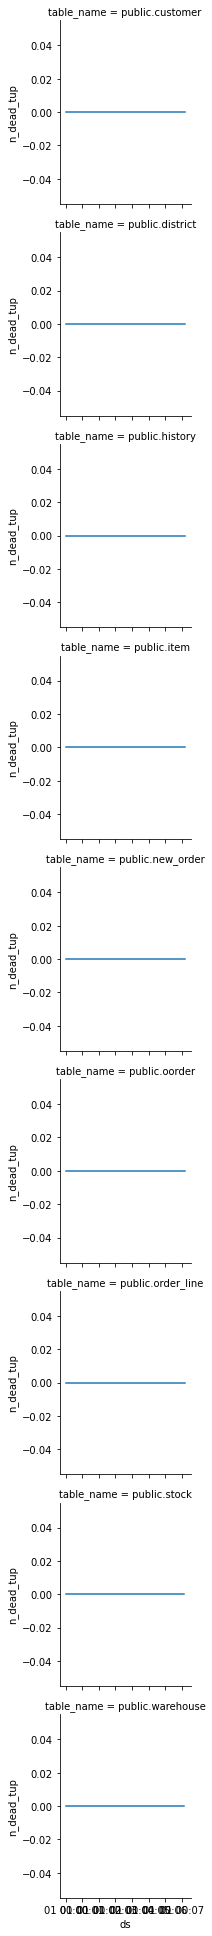

In [126]:
g = sns.FacetGrid(df, row='table_name', sharey=False)
g.map(sns.lineplot, "ds", "n_dead_tup")

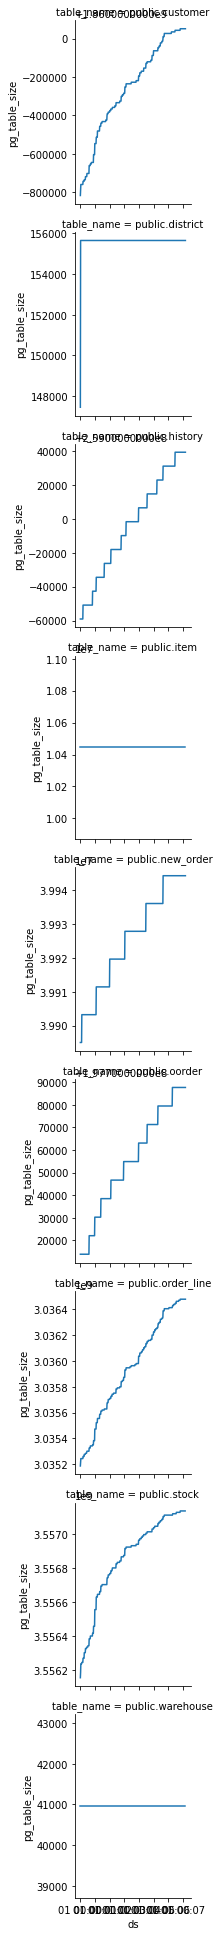

In [127]:
g2 = sns.FacetGrid(df, row='table_name', sharey=False)
g2.map(sns.lineplot, "ds", "pg_table_size")

<AxesSubplot:xlabel='ds', ylabel='pg_table_size'>

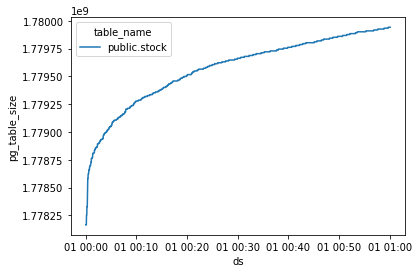

In [104]:
plot_growth(df[df['table_name'] == 'public.stock'].copy(), 'pg_table_size')

<AxesSubplot:xlabel='ds', ylabel='n_dead_tup'>

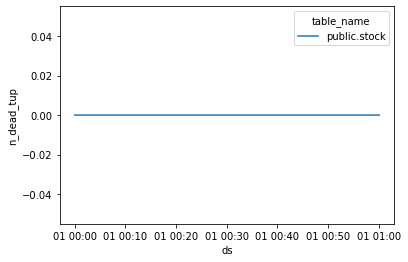

In [105]:
plot_growth(df[df['table_name'] == 'public.stock'].copy(), 'n_dead_tup')